# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("train_preprocessed.csv")
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,income_binary,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,hours-per-week
0,-0.188070,-0.627661,-0.458342,0.0,0.0,-0.561303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0
1,0.992956,-0.768050,-0.458342,0.0,0.0,-0.561303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
2,-0.335699,0.237442,-0.051335,0.0,0.0,1.781569,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
3,1.140584,-0.041966,-0.458342,0.0,0.0,-0.561303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
4,-0.630955,-1.093903,-0.458342,0.0,0.0,-0.561303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,52.5


In [4]:
numerical_features = [
'age',
'education-num',
'capital-gain',
'capital-loss',
'hours-per-week'
]


X = train[numerical_features]

Clusteringul de tip K-Means funcționează optim doar cu variabile numerice. Prin urmare, vom utiliza exclusiv variabilele numerice relevante, conform cerinței

In [5]:
# Pentru a evita influența diferitelor scări ale variabilelor asupra distanțelor euclidiene, aplicăm StandardScaler

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Întrucât biblioteca yellowbrick nu este compatibilă cu Python ≥ 3.12, din cauza eliminării modulului distutils, (am versiunea 3.13.7) am implimentat metoda Elbow manual, folosind inertia din scikit-learn

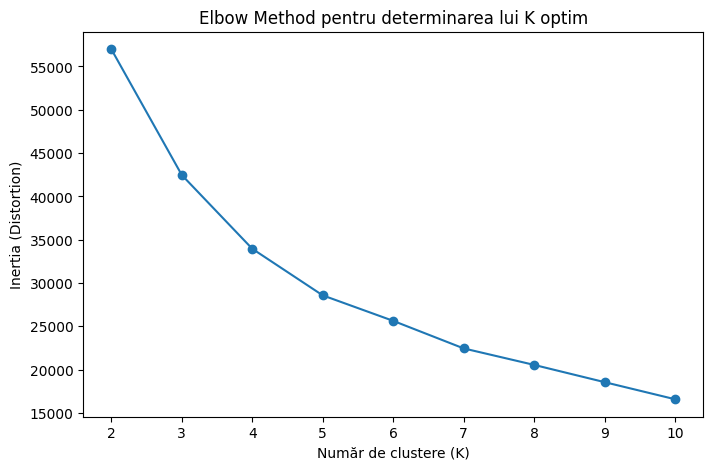

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertii = []
K = range(2, 11)


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertii.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, inertii, marker='o')
plt.xlabel('Număr de clustere (K)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method pentru determinarea lui K optim')
plt.show()

Din grafic se observă o scădere abruptă a inerției între 2 și 3, 3 și 4. După K=4 curba începe să se aplatizez, prin urmare o să aleg 4 ca număr optim de clustere.

In [12]:
optimal_k = 4


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


train['cluster_kmeans'] = clusters_kmeans

In [13]:
from sklearn.metrics import silhouette_score


sil_score = silhouette_score(X_scaled, clusters_kmeans)
sil_score

0.3303155395124674

Rezultatul pentru Silhouette Score indică o separare moderată între clustere. Ceea ce sugerează că modelul indentifică tipare relevante în date, dar nu perfect separate.

In [14]:
# Pentru a vizualiza clusterele, reducem datele la 2 dimensiuni folosind PCA.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


train['PCA1'] = X_pca[:, 0]
train['PCA2'] = X_pca[:, 1]

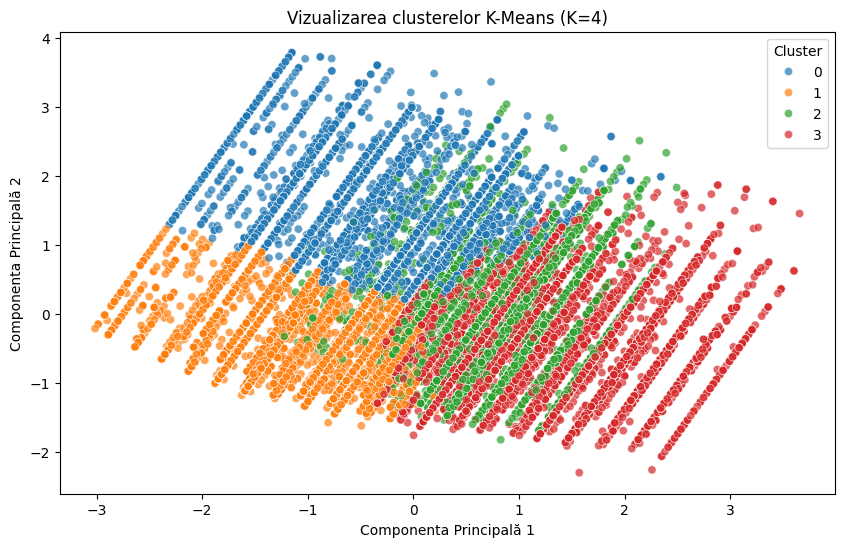

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
x='PCA1',
y='PCA2',
hue='cluster_kmeans',
palette='tab10',
data=train,
alpha=0.7
)
plt.title(f'Vizualizarea clusterelor K-Means (K={optimal_k})')
plt.xlabel('Componenta Principală 1')
plt.ylabel('Componenta Principală 2')
plt.legend(title='Cluster')
plt.show()

Se poate observa că clusterele sunt distincte, dar parțial suprapuse, dar având ca set de date socio-economice, este un lucru normal.

Separarea are loc predominant de a lungul primei componente, fapt ce indică că variabile precum education și hours per week au o contribuție majoră.

Structura confirmă valoarea Silhouette Score, adică indicând o separare moderată, dar coerentă.

In [16]:
cluster_summary = train.groupby('cluster_kmeans')[numerical_features].mean()
cluster_summary

,age,education-num,capital-gain,capital-loss,hours-per-week
cluster_kmeans,,,,,
0,1.131092,-0.545816,0.0,0.0,38.271015
1,-0.825358,-0.401285,0.0,0.0,37.467786
2,0.035129,-0.378566,0.0,0.0,50.269774
3,0.149231,1.325933,0.0,0.0,43.661765


Întrucât valorile sunt standartizate interpratarea se face relativ la medie.

Cluster 0: Persoane mai în vârstă, educație mai scăzută.
Orele lucrate sunt apropiate de medie, aprox 38h/week.

Cluster 1: Persoane tinere, educație redusă. Vârsta și educația sub medie, la fel și orele lucrate sunt ușor sub medie, aprox 37.

Cluster 2: Forță de muncă intensivă. Vârsta apropiată de medie, educația ușor sub medie și ore lucrate mult peste medie, aprox 50 h/week. 

Cluster 3: Educație ridicată, implicare mare. Vârsta ușor peste medie, educația mult peste medie (+1.33), la fel și orele lucrate sunt peste medie.

Concluzii privind clusterele:

Persoanele cu educație ridicată tind să lucreze mai multe ore pe săptămână.

Indivizii mai tineri sunt grupați în clustere cu educație și timp de muncă mai redus.

Metode alternative de clustering

In [17]:
# Clustering Ierarhic

from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)


sil_hc = silhouette_score(X_scaled, clusters_hc)
sil_hc

0.30915458663986406

Pentru clusteringul ierarhic a fost obținut un Silhouette Score de 0.309, valoare ușor mai mică decât cea obținută prin K-Means (0.33).

Diferența relativ mică între scoruri sugerează că datele nu au clustere naturale foarte bine delimitate.

In [23]:
# DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# eliminăm punctele de tip noise (-1)
mask = clusters_dbscan != -1

if len(set(clusters_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], clusters_dbscan[mask])
    sil_dbscan
else:
    sil_dbscan = None
    print("DBSCAN nu a identificat suficiente clustere pentru Silhouette Score.")

DBSCAN nu a identificat suficiente clustere pentru Silhouette Score.


Algoritmul DBSCAN nu a identificat suficiente clustere pentru a permite calcularea scorului Silhouette, majoritatea observațiilor fiind etichetate fie într-un singur cluster, fie ca noise.

Algoritmul DBSCAN este ineficient în cazul setului de date Adult Income, deoarece distribuția variabilelor numerice grupări naturale evidente.

Compararea metodelor de clustering indică faptul că K-Means oferă cea mai bună performanță pentru acest set de date, atât din perspectiva scorului Silhouette, cât și a interpretabilității clusterelor. Clusteringul ierarhic produce rezultate comparabile, dar ușor inferioare, în timp ce DBSCAN nu este adecvat din cauza lipsei unor structuri de densitate bine definite. Astfel, K-Means reprezintă metoda optimă pentru analiza exploratorie a acestui dataset.

In [24]:
train['cluster_kmeans'].value_counts(normalize=True)

cluster_kmeans
1    0.366130
3    0.249491
0    0.229436
2    0.154943
Name: proportion, dtype: float64

Clusterele sunt relativ echilibrate, fără a exista un cluster dominant excesiv, ceea ce indică faptul că modelul K-Means nu produce grupări artificiale sau extreme.